In [1]:
import pandas as pd

from geocoder import Geocoder
from semantic_model import Semanticmodel, Visualizator

/home/gk/code/SASHA_NIRMA_23_24/sloyka/.venv/lib/python3.8/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


[nltk_data] Downloading package punkt to /home/gk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/gk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv(
    "/home/gk/code/SASHA_NIRMA_23_24/sloyka/data/raw/total_reports.csv",
    delimiter=";",
    index_col=0,
).dropna(subset="Текст")
df.rename(columns={"Текст": "Текст комментария"}, inplace=True)

In [4]:
# pip install ipywidgets pandarallel
# !pip install loguru

In [5]:
df.reset_index(drop=False, inplace=True)

In [6]:
df['Название улицы (проспекта, переулка)'].value_counts()

Ветеранов              131
Бабушкина              112
Гражданский            111
Народного Ополчения    108
Лени Голикова          101
                      ... 
Летчика Лихолетова       1
Бабушкин                 1
Климов                   1
1-я Красноармейская      1
5-я Красноармейская      1
Name: Название улицы (проспекта, переулка), Length: 1598, dtype: int64

In [7]:
df[df['Текст комментария'].str.contains('ражданс')]['Текст комментария']

280      Здравствуйте, ситуация такая живём в студии 25...
419      Добрый день! Тема предыдущего обращения для на...
532      Уважаемый Александр Дмитриевич! Жители дома 27...
861      Александр Дмитриевич, добрый вечер.<br>Пишу ва...
946      Здравствуйте! По адресу: Гражданский проспект ...
                               ...                        
19201                            И Гражданский 114, корп 1
19251    Добрый день, Александр Дмитриевич!<br>Обращаюс...
19323    Гражданский 114 тоже вонь , администрация кали...
19331    Воняет ужасно Гражданский31/4,готова тоже подп...
19369    Аналогичная ситуация рядом с остановкой Гражда...
Name: Текст комментария, Length: 193, dtype: object

In [8]:
g = Geocoder()
names_df = g.run(df, text_column='Текст комментария')
names_df

2024-01-31 17:39:40,448 SequenceTagger predicts: Dictionary with 5 tags: O, S-ADDRESS, B-ADDRESS, E-ADDRESS, I-ADDRESS


2024-01-31 17:40:09.314 | INFO     | geocoder:clear_names:232 - clear_names started
100%|██████████| 3307/3307 [00:00<00:00, 191608.83it/s]
2024-01-31 17:40:09.360 | INFO     | geocoder:get_street:561 - get_street started
2024-01-31 17:40:09.370 | INFO     | geocoder:get_street:566 - extract_ner_street started
100%|██████████| 19761/19761 [05:28<00:00, 60.24it/s] 
2024-01-31 17:49:28.481 | INFO     | geocoder:get_street:581 - pattern1.sub started
100%|██████████| 11192/11192 [00:00<00:00, 390054.35it/s]
2024-01-31 17:49:28.517 | INFO     | geocoder:get_street:586 - pattern2.findall started
100%|██████████| 11192/11192 [00:00<00:00, 658982.95it/s]
2024-01-31 17:49:28.538 | INFO     | geocoder:get_street:594 - pattern2.sub started
100%|██████████| 11192/11192 [00:00<00:00, 650229.25it/s]
2024-01-31 17:49:28.563 | INFO     | geocoder:get_street:603 - extract_building_num started
100%|██████████| 11192/11192 [00:00<00:00, 23368.98it/s]
2024-01-31 17:49:29.049 | INFO     | geocoder:get_stre

key_0 Дата создания  ИС      ID                       Направление  \
0          0       23.2.22  ИМ  297578                               ЖКХ   
1          1       23.2.22  ИМ  297614                               ЖКХ   
2          2       23.2.22  ИМ  297707                               ЖКХ   
3          3       23.2.22  ИМ  297775                               ЖКХ   
4          3       23.2.22  ИМ  297775                               ЖКХ   
...      ...           ...  ..     ...                               ...   
13103   8749      30.12.22  ИМ  421815                               ЖКХ   
13104   8750      31.12.22  ИМ  421954                               ЖКХ   
13105   8751      30.12.22  ИМ  421818  Социальное обслуживание и защита   
13106   8752      31.12.22  ИМ  421983             Содержание территорий   
13107   8753      31.12.22  ИМ  422174                   Благоустройство   

                                               Категория  \
0             Ненадлежащее содержание и эксплуатация МКД   
1         Ненадлежащее качество или отсутствие отопления   
2             Ненадлежащее содержание и эксплуатация МКД   
3                 Ненадлежащая уборка подъездов и лифтов   
4                 Ненадлежащая уборка подъездов и лифтов   
...                                                  ...   
13103                           Отсутствие холодной воды   
13104                                   Ремонт подъездов   
13105             Создание доступной среды для инвалидов   
13106          Состояние зданий учреждений и организаций   
13107  ★ Нарушение правил уборки от снега и наледи вн...   

                                Исполнитель         Локация  \
0      АДМИНИСТРАЦИЯ КРАСНОСЕЛЬСКОГО РАЙОНА  Красносельский   
1          АДМИНИСТРАЦИЯ МОСКОВСКОГО РАЙОНА      Московский   
2         АДМИНИСТРАЦИЯ ЦЕНТРАЛЬНОГО РАЙОНА     Центральный   
3                                       NaN         Невский   
4                                       NaN         Невский   
...                                     ...             ...   
13103         АДМИНИСТРАЦИЯ НЕВСКОГО РАЙОНА         Невский   
13104                                   NaN     Центральный   
13105      АДМИНИСТРАЦИЯ ПУШКИНСКОГО РАЙОНА      Пушкинский   
13106       АДМИНИСТРАЦИЯ КИРОВСКОГО РАЙОНА       Кировский   
13107         АДМИНИСТРАЦИЯ НЕВСКОГО РАЙОНА         Невский   

                                                  ссылка  \
0      https://im.gosuslugi.ru/#/incidents/stage/3?in...   
1      https://im.gosuslugi.ru/#/incidents/stage/3?in...   
2      https://im.gosuslugi.ru/#/incidents/stage/3?in...   
3      https://im.gosuslugi.ru/#/incidents/stage/3?in...   
4      https://im.gosuslugi.ru/#/incidents/stage/3?in...   
...                                                  ...   
13103  https://im.gosuslugi.ru/#/incidents/stage/3?in...   
13104  https://im.gosuslugi.ru/#/incidents/stage/3?in...   
13105  https://im.gosuslugi.ru/#/incidents/stage/3?in...   
13106  https://im.gosuslugi.ru/#/incidents/stage/3?in...   
13107  https://im.gosuslugi.ru/#/incidents/stage/3?in...   

                                       Текст комментария  ... Unnamed: 25  \
0      У нас вообще заклеили скотчем спи...дил Батаре...  ...         NaN   
1      Добрый день, вроде бы праздник сегодня, но поч...  ...         NaN   
2      На собрании собственников МКД по адресу Невски...  ...         NaN   
3      Индустриальный пр.<br>д. 35 к.2. 6 подъезд, уб...  ...         NaN   
4      Индустриальный пр.<br>д. 35 к.2. 6 подъезд, уб...  ...         NaN   
...                                                  ...  ...         ...   
13103  Здравствуйте. Сегодня в 12 часов дня была откл...  ...         NaN   
13104  А у нас на Лиговском проспекте в доме 58 ( вто...  ...         NaN   
13105  Уважаемый Александр Дмитриевич!<br>Я являюсь п...  ...         NaN   
13106  [club189271005|Государственная жилищная инспек...  ...         NaN   
13107  Добрый вечер, Александр Дмитриевич!<br>По

In [12]:
# pip install pyarrow

In [11]:
# names_df.to_feather('df_strts.feather')

In [2]:
names_df = pd.read_feather('df_strts.feather')

In [3]:
names_df.dropna(subset='initial_street', inplace=True)

In [4]:
def replace_words(row):
    text = row['Текст комментария']
    
    return text.replace(row['initial_street'], row['only_full_street_name'])

# Apply the function to create a new column
names_df['ModifiedTextCol'] = names_df.apply(replace_words, axis=1)

In [5]:
names_df.head(2)

key_0 Дата создания  ИС      ID Направление  \
0      0       23.2.22  ИМ  297578         ЖКХ   
1      1       23.2.22  ИМ  297614         ЖКХ   

                                        Категория  \
0      Ненадлежащее содержание и эксплуатация МКД   
1  Ненадлежащее качество или отсутствие отопления   

                            Исполнитель         Локация  \
0  АДМИНИСТРАЦИЯ КРАСНОСЕЛЬСКОГО РАЙОНА  Красносельский   
1      АДМИНИСТРАЦИЯ МОСКОВСКОГО РАЙОНА      Московский   

                                              ссылка  \
0  https://im.gosuslugi.ru/#/incidents/stage/3?in...   
1  https://im.gosuslugi.ru/#/incidents/stage/3?in...   

                                   Текст комментария  ...     Street  Score  \
0  У нас вообще заклеили скотчем спи...дил Батаре...  ...  ленинский  0.981   
1  Добрый день, вроде бы праздник сегодня, но поч...  ...    ломаная  0.997   

  Numbers initial_street  Toponims  \
0      77      ленинский  проспект   
1       3        Ломаная     улица   

                               full_street_name  \
0  Ленинский проспект 77 Санкт-Петербург Россия   
1        Ломаная улица 3 Санкт-Петербург Россия   

                                 location_options  \
0  [Ленинский проспект 77 Санкт-Петербург Россия]   
1        [Ломаная улица 3 Санкт-Петербург Россия]   

                                addr_to_geocode only_full_street_name  \
0  Ленинский проспект 77 Санкт-Петербург Россия    Ленинский проспект   
1        Ломаная улица 3 Санкт-Петербург Россия         Ломаная улица   

                                     ModifiedTextCol  
0  У нас вообще заклеили скотчем спи...дил Батаре...  
1  Добрый день, вроде бы праздник сегодня, но поч...  

[2 rows x 37 columns]

In [13]:
names_df['only_full_street_name'].value_counts()[:30]

Гражданский проспект            251
Гражданский переулок            207
Гражданский мост                207
мост Народного Ополчения        170
проспект Народного Ополчения    170
Невский проспект                161
проспект Ветеранов              147
Невский переулок                135
Невский путепровод              135
Московский проспект             124
Московское шоссе                116
Лиговский проспект              109
Дачный проспект                 106
улица Бабушкина                  96
Ленинский проспект               90
Пулковское шоссе                 84
Заречная улица                   82
Дачный путепровод                81
Дачный переулок                  81
Северный проспект                79
Индустриальный проспект          79
мост Обуховской Обороны          78
проспект Обуховской Обороны      78
Белградская улица                78
проспект Луначарского            77
улица Ломоносова                 76
улица Седова                     76
Будапештская улица          

In [6]:
sm = Semanticmodel(
    training_df=names_df,
    text_column="ModifiedTextCol",
    street_clean_column="only_full_street_name",
    text_street_column="initial_street",
    workers=10,
)

Parsing sentences from training set...


  0%|          | 0/13108 [00:00<?, ?it/s]

/home/gk/code/SASHA_NIRMA_23_24/sloyka/factfinder/src/semantic_model.py:48: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review, "lxml").get_text()
100%|██████████| 56386/56386 [01:03<00:00, 883.56it/s] 


In [7]:
model = sm.make_model()

In [8]:
sm.training_data

[['вообще',
  'заклеить',
  'скотч',
  'спать',
  'дил',
  'батарея',
  'главный',
  'инженер',
  'говорить',
  'вс',
  'ленинский проспект',
  'проспект',
  'проспект'],
 ['добрый',
  'день',
  'вроде',
  'праздник',
  'сегодня',
  'почему',
  'издеваться',
  'человек',
  'квартира',
  'холодрыг',
  'батарея',
  'холодное',
  'почему',
  'лето',
  'наступить',
  'топить',
  'экономить',
  'кварплат',
  'отопление',
  'платить',
  'быть'],
 [],
 ['ломаный', 'улица', 'улица', 'дом', 'б', 'московский проспект', 'р', 'н'],
 ['собрание',
  'собственник',
  'мкд',
  'адрес',
  'невский проспект',
  'проспект',
  'пр',
  'далее',
  'лита',
  'б',
  'парадная улица',
  'принять',
  'решение',
  'отказ',
  'установка',
  'умный',
  'домофон',
  'программа',
  'безопасный',
  'город'],
 ['исправный', 'домофон', 'дверь', 'парадный'],
 ['просить', 'исключить', 'дать', 'программа'],
 ['заявление', 'подпись', 'приложить', 'файл'],
 ['индустриальный путепровод', 'путепровод', 'пр', 'далее'],
 [],
 [

In [9]:
sm.training_df.iloc[0, -1]

'У нас вообще заклеили скотчем спи...дил Батарею главный инженер и говорит всё хорошо.... Ленинский проспект проспект 77'

In [20]:
model.wv.most_similar('невский проспект', topn=50)

[('лиговский', 0.878847062587738),
 ('индустриальный путепровод', 0.8645601272583008),
 ('лита', 0.864005446434021),
 ('витебский', 0.8412185311317444),
 ('дачный', 0.8406279683113098),
 ('блюхер', 0.8208234906196594),
 ('суворовский проспект', 0.8162468075752258),
 ('кт', 0.8129388689994812),
 ('альпийский переулка', 0.811731219291687),
 ('б', 0.8086795210838318),
 ('северный проспект', 0.8062263131141663),
 ('лесной переулка', 0.8045733571052551),
 ('просрект', 0.8012064695358276),
 ('куйбышев', 0.7969222664833069),
 ('лермонтовский', 0.7929162979125977),
 ('рижский проспект', 0.7875810861587524),
 ('проспект науки', 0.783650279045105),
 ('рыбацкий проспект', 0.7829437851905823),
 ('проспект энтузиаст', 0.7803095579147339),
 ('насиндустриальный', 0.7798833847045898),
 ('пер', 0.7791547179222107),
 ('горе', 0.7759785056114197),
 ('московский проспект', 0.775170624256134),
 ('новоизмайловский', 0.7738912105560303),
 ('ириновский', 0.7738185524940491),
 ('вознесенский', 0.77343660593032

In [14]:
sm.save_model(model=model, model_path='model.model')

Model saved in model.model


In [26]:
word_list = names_df['only_full_street_name'].str.lower().values

# Ensure words are in the model's vocabulary
valid_words = [word for word in word_list if word in model.wv.key_to_index]

# Get embeddings for valid words
embeddings = [model.wv[word] for word in valid_words]

In [47]:
import networkx as nx
import matplotlib.pyplot as plt

# Find similar words
similar_words = {}

for i, word in enumerate(valid_words):
    similar_words[word] = [similar[0] for similar in model.wv.most_similar(word, topn=50)]

G = nx.Graph()

# Add nodes
G.add_nodes_from(valid_words)

# Add edges based on similarity
for word, similar_list in similar_words.items():
    for similar_word in similar_list:
        if similar_word not in similar_words.keys():
            G.add_edges_from([(word, similar_word)])

# Draw the graph


In [77]:
remove = [node for node,degree in dict(G.degree()).items() if degree < 2]
G.remove_nodes_from(remove)

In [52]:
# pip install plotly

In [100]:
nx.write_graphml(G, 'G.graphml')

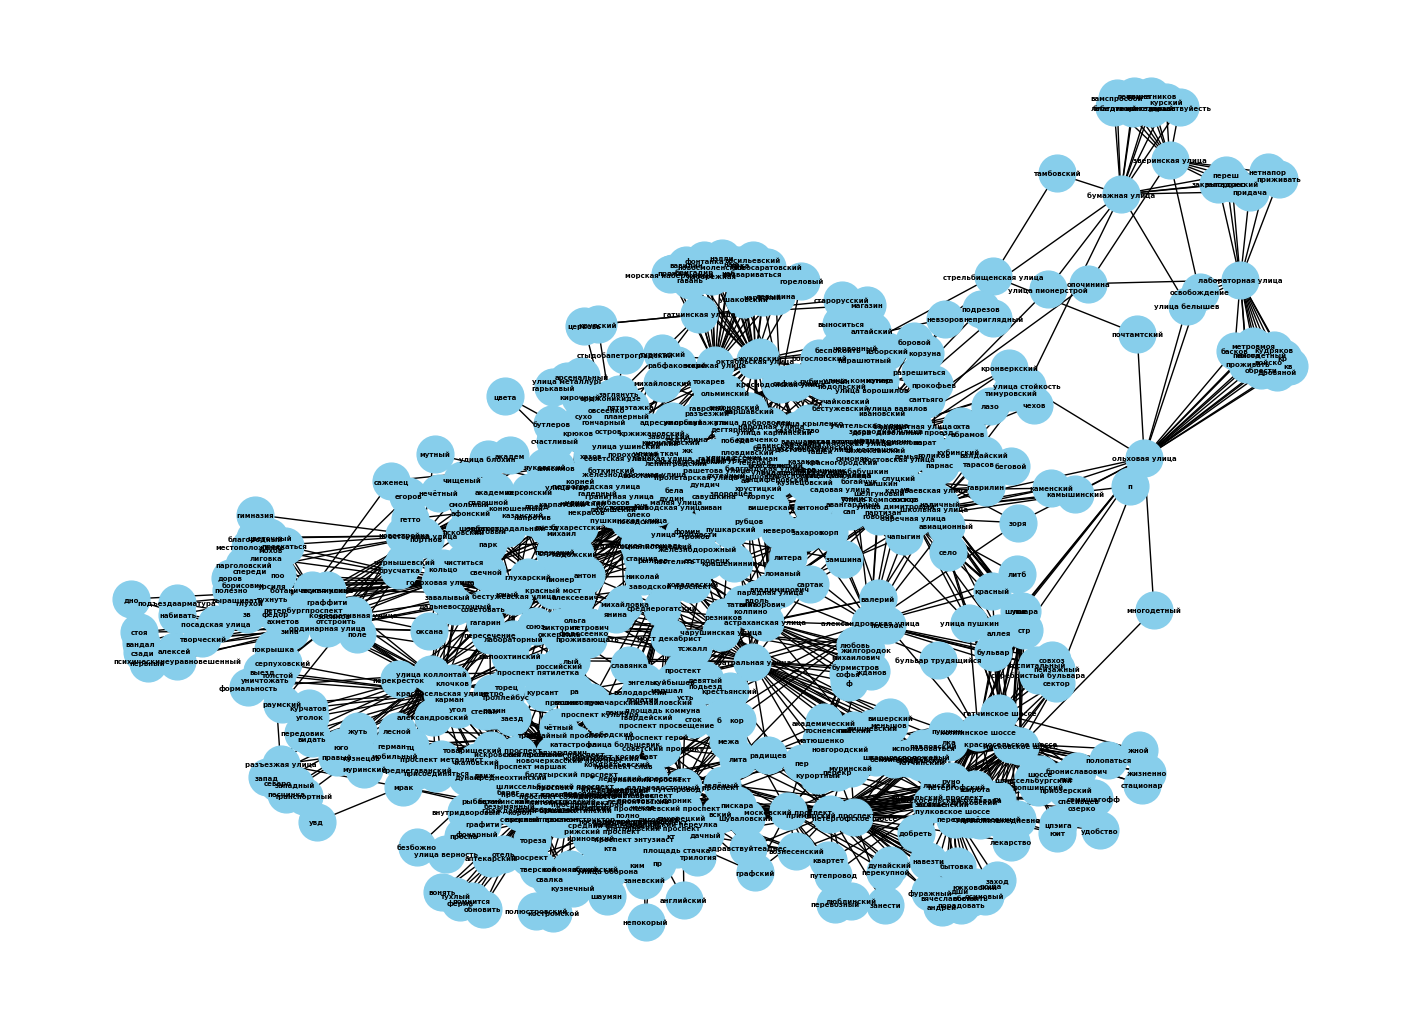

In [78]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=5)
plt.show()

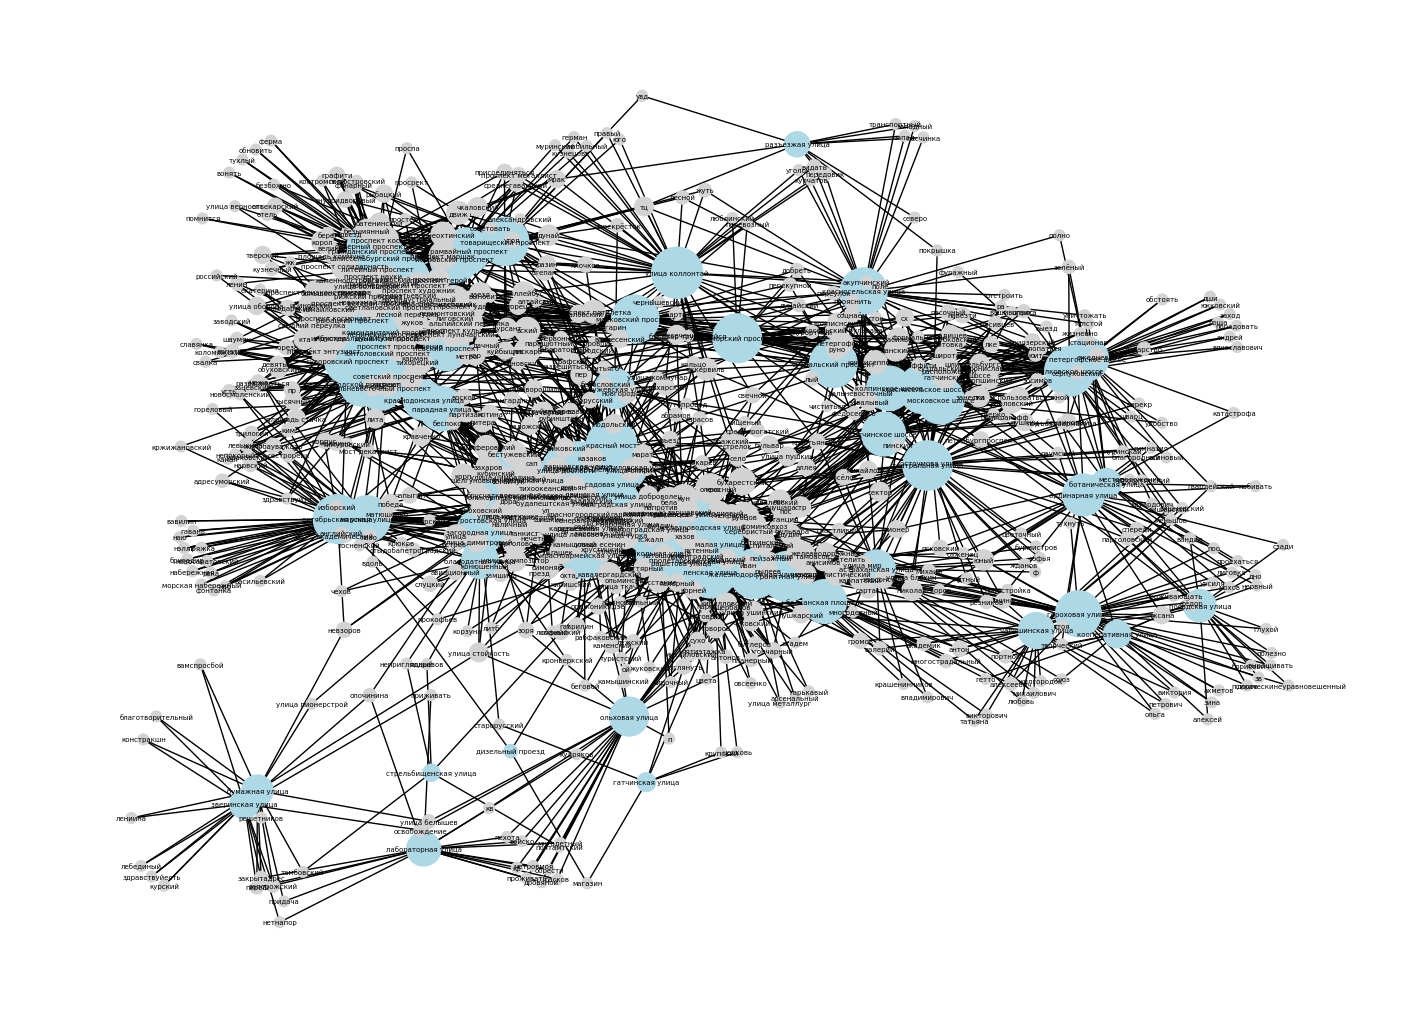

In [85]:
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))
colors = [['lightgrey', 'lightblue'][node in valid_words] 
          for node in G.nodes()]
d = dict(G.degree)
nx.draw(G, pos, 
        with_labels=True, 
        nodelist=d, 
        node_size=[d[k]*30 for k in d],
        font_size=5,
        node_color=colors)

In [87]:
# pip install pyvis

In [97]:
from pyvis.network import Network
# Plot with pyvis
net = Network(
    directed = False,
    select_menu = True, # Show part 1 in the plot (optional)
    filter_menu = True, # Show part 2 in the plot (optional)
)
net.show_buttons() # Show part 3 in the plot (optional)
net.from_nx(G) # Create directly from nx graph
# net.show('test.html')

In [99]:
from IPython.display import display, HTML

net.save_graph("networkx-pyvis.html")
# HTML(filename="networkx-pyvis.html")

In [33]:
G.nodes(data=True)

NodeDataView({'ленинский проспект': {}, 'невский проспект': {}, 'индустриальный путепровод': {}, 'рыбацкий проспект': {}, 'белградская улица': {}, 'рижский проспект': {}, 'октябрьская улица': {}, 'краснопутиловская улица': {}, 'красноармейская улица': {}, 'московский проспект': {}, 'заречная улица': {}, 'комендантский проспект': {}, 'дунайский проспект': {}, 'проспект науки': {}, 'московское шоссе': {}, 'советская улица': {}, 'будапештская улица': {}, 'пушкинская улица': {}, 'шлиссельбургский проспект': {}, 'суздальский проспект': {}, 'астраханская улица': {}, 'варшавская улица': {}, 'суворовский проспект': {}, 'искровский проспект': {}, 'богатырский проспект': {}, 'новочеркасский проспект': {}, 'караваевская улица': {}, 'петергофское шоссе': {}, 'приморский проспект': {}, 'улица крыленко': {}, 'стрельбищенская улица': {}, 'пулковское шоссе': {}, 'гранитная улица': {}, 'ленская улица': {}, 'садовая улица': {}, 'народная улица': {}, 'морская улица': {}, 'улица цимбалина': {}, 'разъезжая

In [23]:
v = Visualizator('невский проспект','model.model')

Image is saved in graph_1.jpg.


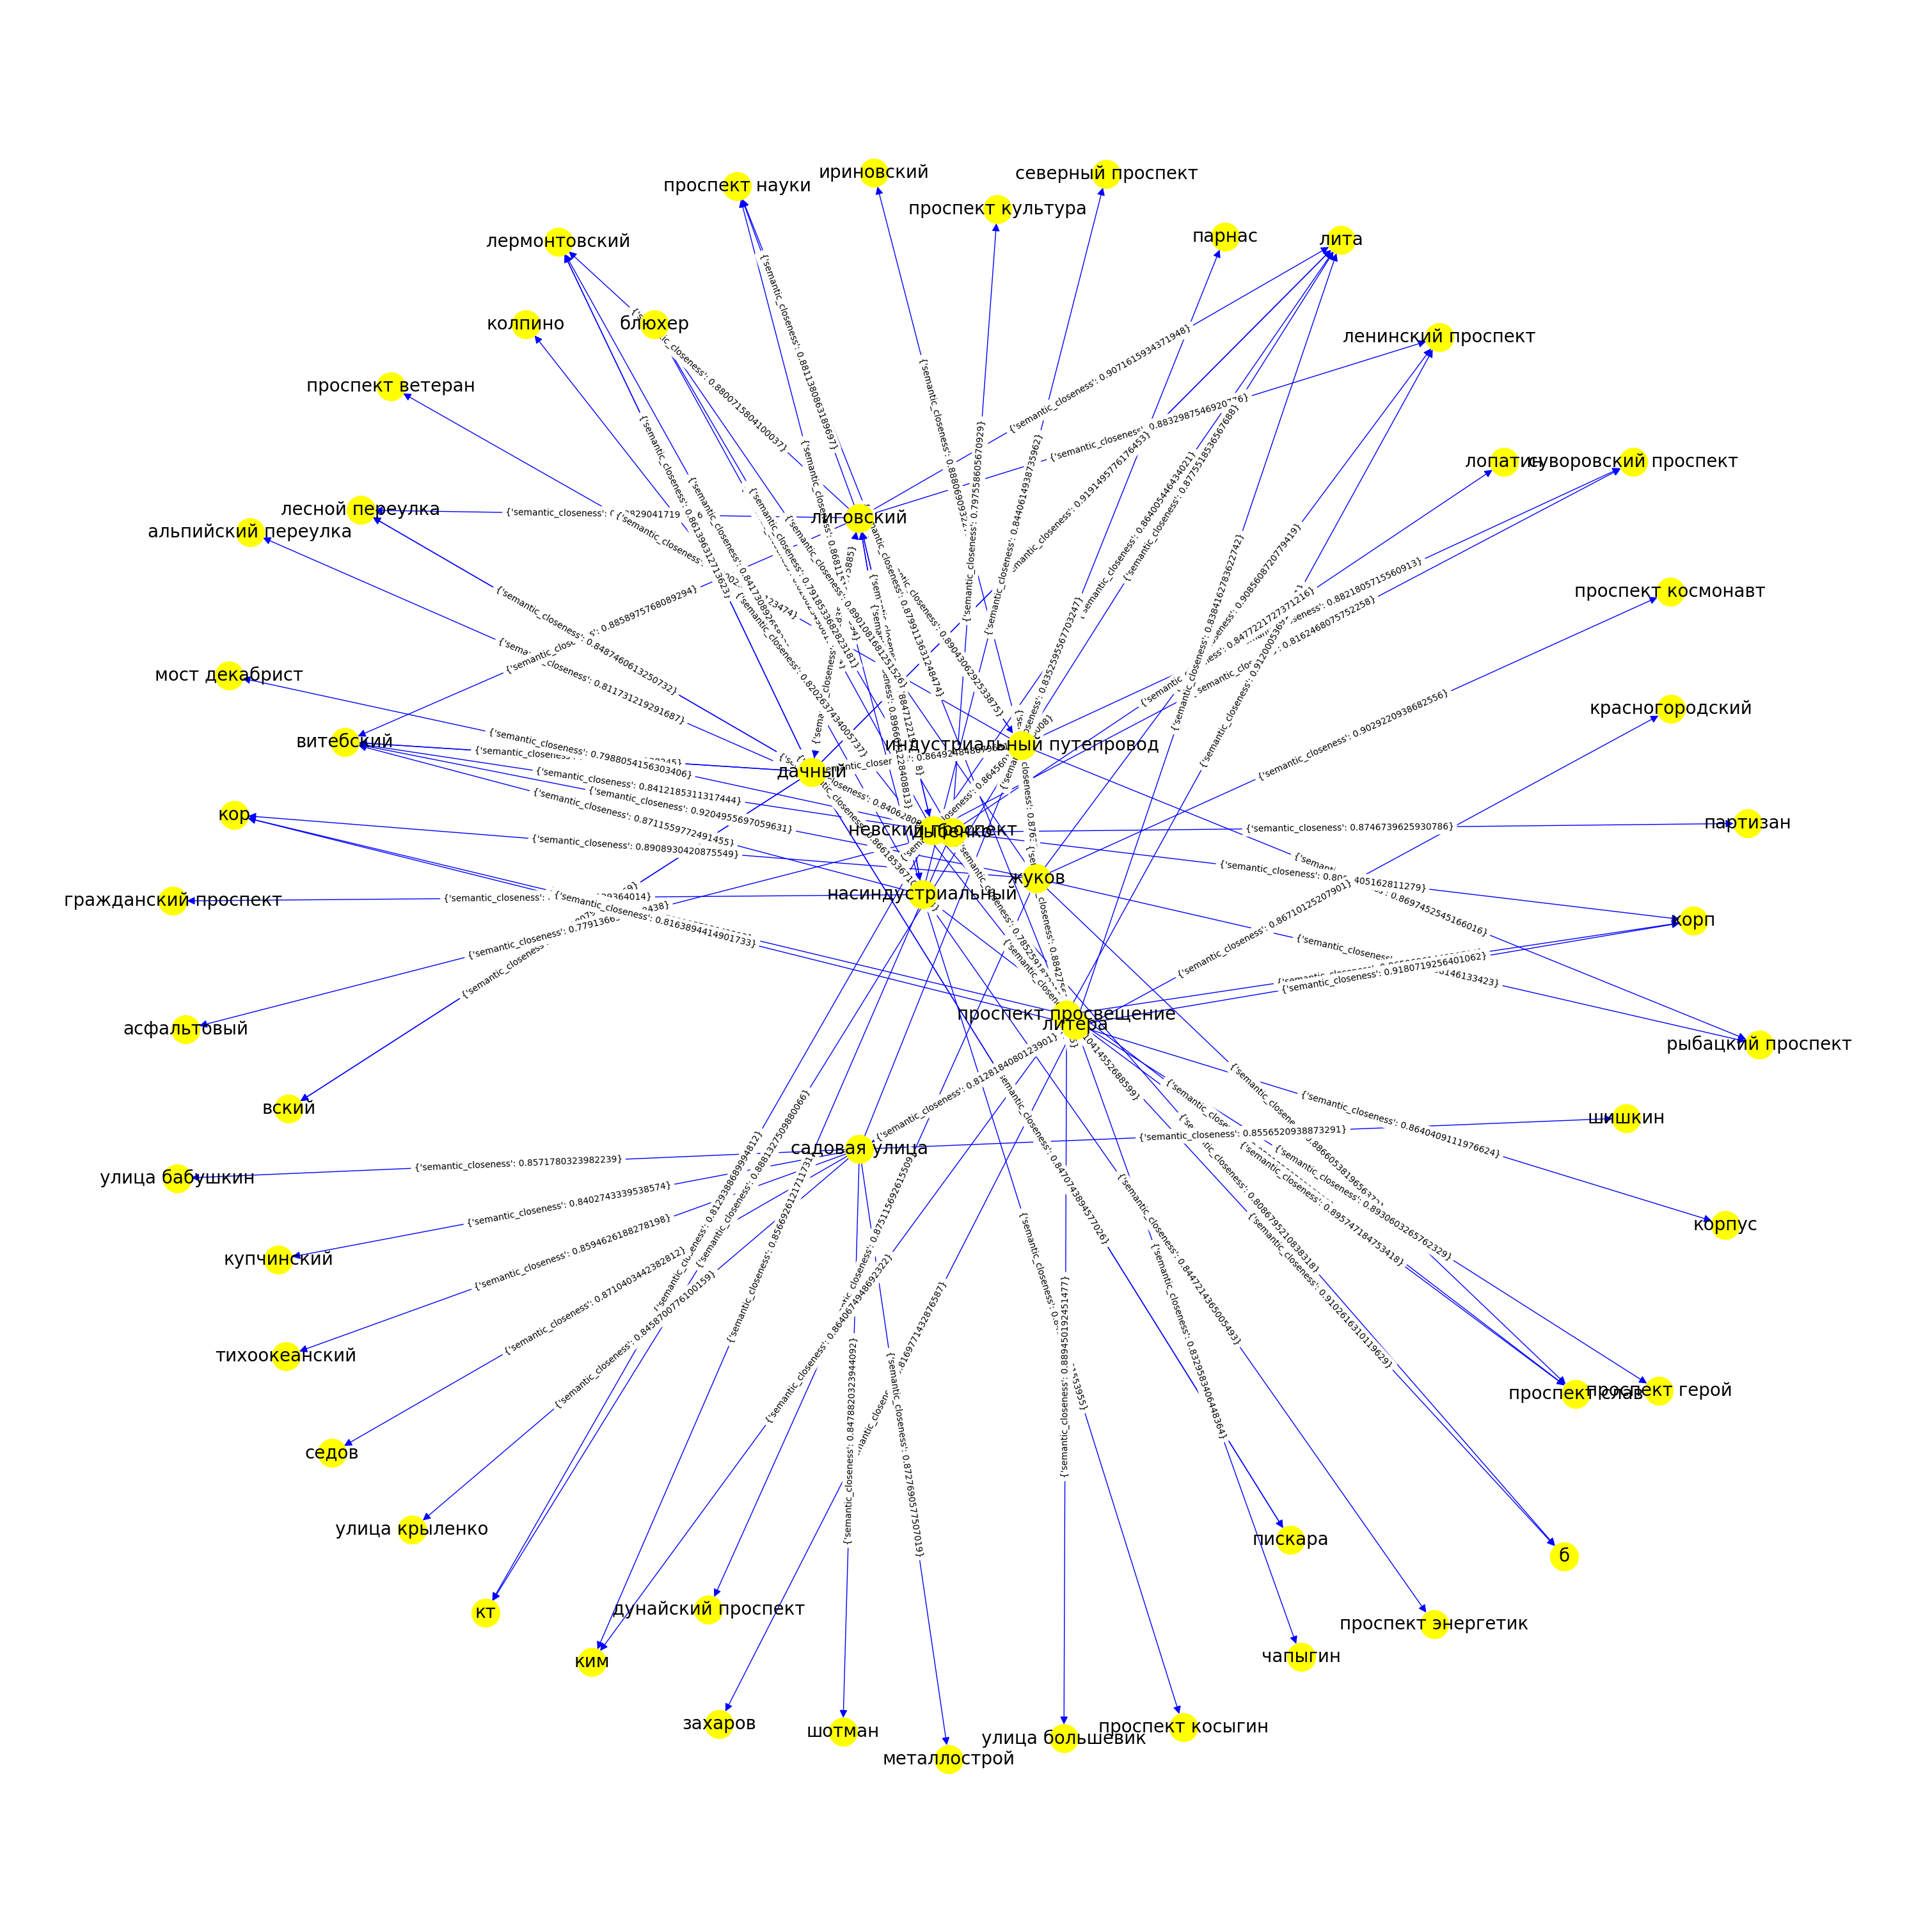

In [24]:
v.save_graph_img('graph_1.jpg')